In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# importing the modeling libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Input data files are available in the read-only "../input/" directory
# load listings data
listings_df = pd.read_csv('/kaggle/input/seattle/listings.csv')

In [23]:
# explore the data
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [24]:
# setting max_cols as None, allowing all columns to be displayed when printed
pd.set_option("display.max_columns", None)
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

# **Initial data cleaning and preparation for exploration**

In [25]:
# fixing the type of the price column and removing the '$' from the number
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

# **Explore the data**

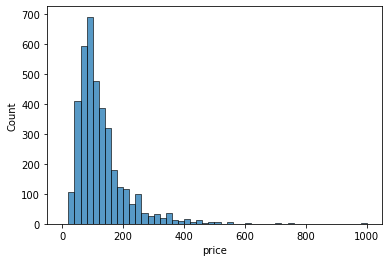

In [26]:
# check the price distribution in the dataset
bins = np.arange(0, listings_df['price'].max()+20, 20)
sns.histplot(listings_df['price'], bins = bins, kde = False);

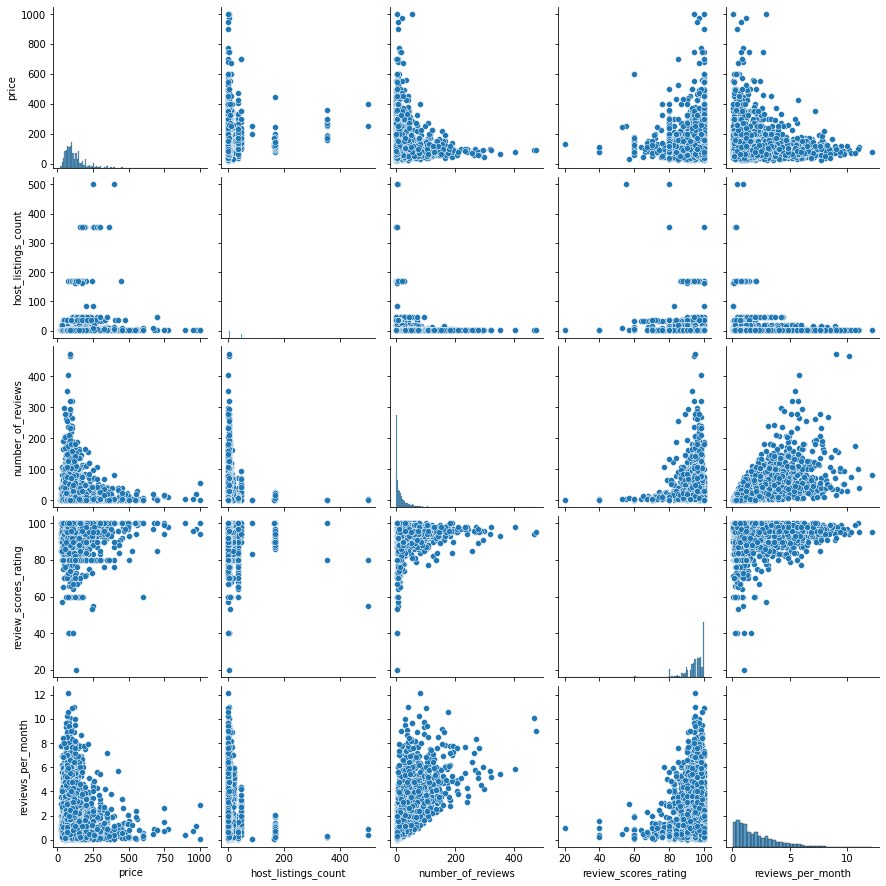

In [27]:
# exploring the impact of some of the variables on one another, especially the list price
explore_df = listings_df[["price", "host_is_superhost","host_listings_count", "number_of_reviews", "review_scores_rating", "cancellation_policy",
               "reviews_per_month"]]

sns.pairplot(explore_df);

**Exploring how price differs according to the neighborhood**

In [28]:
# exploring the columns related to neighborhoods representation
for col in listings_df[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']]:
    print(listings_df[col].unique())

['Queen Anne' nan 'Ballard' 'Phinney Ridge' 'Fremont' 'Lower Queen Anne'
 'Westlake' 'Wallingford' 'Green Lake' 'Minor' 'Madrona'
 'Harrison/Denny-Blaine' 'Leschi' 'University District' 'Roosevelt'
 'Madison Park' 'Capitol Hill' 'Atlantic' 'North Beacon Hill'
 'Central Business District' 'Pike Place Market' 'Pike Market' 'Eastlake'
 'Portage Bay' 'South Lake Union' 'Magnolia' 'Belltown'
 'International District' 'Yesler Terrace' 'First Hill' 'Pioneer Square'
 'Gatewood' 'The Junction' 'Arbor Heights' 'Alki' 'North Admiral'
 'Crown Hill' 'Genesee' 'Fairmount Park' 'Interbay' 'Industrial District'
 'Holly Park' 'South Beacon Hill' 'Greenwood' 'Bitter Lake' 'Fauntleroy'
 'Mount Baker' 'Columbia City' 'Seward Park' 'Brighton' 'South Delridge'
 'Highland Park' 'High Point' 'View Ridge' 'Windermere' 'Dunlap'
 'Rainier Beach' 'North Delridge' 'Maple Leaf' 'Bryant' 'Ravenna'
 'Wedgewood' 'Riverview' 'Montlake' 'Broadway' 'Stevens' 'Victory Heights'
 'Mathews Beach' 'Cedar Park' 'Meadowbrook' '

Based on the values explored above, we would go with the 'neighbourhood_group_cleansed' column as its values are more generalized

In [29]:
# explore the average price per neighborhood and sort the neighborhoods accordingly
neig_avg_price = listings_df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)

print(neig_avg_price)

neighbourhood_group_cleansed
Magnolia               177.672131
Queen Anne             157.223729
Downtown               154.405660
West Seattle           141.359606
Cascade                140.101124
Capitol Hill           130.592593
Central Area           128.338753
Ballard                124.682609
Other neighborhoods    119.968514
Interbay               109.727273
Seward Park            108.477273
Beacon Hill             94.669492
University District     93.639344
Lake City               92.671642
Rainier Valley          91.899371
Northgate               88.550000
Delridge                83.278481
Name: price, dtype: float64


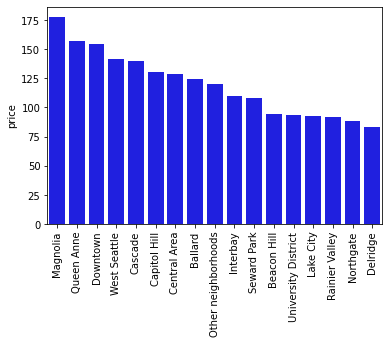

In [30]:
sns.barplot(x = neig_avg_price.index.values, y = neig_avg_price, color = 'blue');

# Use xticks to rotate the category labels counter-clockwise
plt.xticks(rotation=90);

In [31]:
neig_std_price = listings_df.groupby('neighbourhood_group_cleansed')['price'].std().sort_values(ascending=False)

print(neig_std_price)

neighbourhood_group_cleansed
Magnolia               150.078726
Queen Anne             115.863385
Cascade                112.179042
Capitol Hill            92.442331
Downtown                90.902800
West Seattle            89.147801
Ballard                 87.925033
Other neighborhoods     86.580450
Central Area            80.260558
Seward Park             71.718276
Beacon Hill             61.528682
Interbay                60.003485
University District     59.721816
Lake City               57.212625
Rainier Valley          52.505599
Delridge                41.797110
Northgate               38.642110
Name: price, dtype: float64


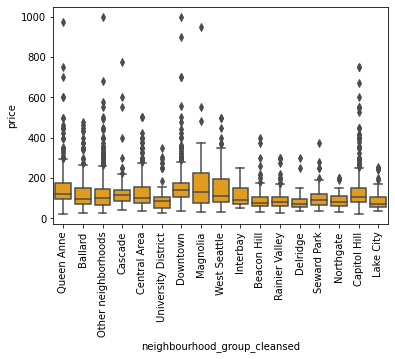

In [32]:
sns.boxplot(data=listings_df, x='neighbourhood_group_cleansed', y='price', color='orange');

# Use xticks to rotate the category labels counter-clockwise
plt.xticks(rotation=90);

**Explore common property types per neighborhood**

In [33]:
# print the most common property type in each neighborhood
print(listings_df.groupby('neighbourhood_group_cleansed')['property_type'].agg(pd.Series.mode))

neighbourhood_group_cleansed
Ballard                             House
Beacon Hill                         House
Capitol Hill                    Apartment
Cascade                         Apartment
Central Area                        House
Delridge                            House
Downtown                        Apartment
Interbay               [Apartment, House]
Lake City                           House
Magnolia                            House
Northgate                           House
Other neighborhoods                 House
Queen Anne                      Apartment
Rainier Valley                      House
Seward Park                         House
University District             Apartment
West Seattle                        House
Name: property_type, dtype: object


# **Preparing the data for modeling and price prediction**

In [34]:
# dropping columns that will not help with predicting the price
cols_drop = ['id','listing_url','scrape_id','last_scraped','thumbnail_url','medium_url',
             'picture_url', 'xl_picture_url','host_id','host_name','host_url','host_thumbnail_url',
             'host_picture_url','host_verifications','street','neighbourhood','neighbourhood_cleansed',
             'zipcode','smart_location','city','state','country','latitude','longitude','weekly_price',
             'monthly_price','calendar_updated','calendar_last_scraped','first_review','last_review',
             'name','summary','space','description','experiences_offered','neighborhood_overview', 
             'notes','transit','host_about','license','calculated_host_listings_count']


listings_df = listings_df.drop(cols_drop, axis=1)
listings_df.shape

(3818, 51)

In [35]:
# explore the missing values in the columns of interest
listings_df[listings_df.columns[listings_df.isnull().any()]].isnull().sum()

host_since                        2
host_location                     8
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
property_type                     1
bathrooms                        16
bedrooms                          6
beds                              1
square_feet                    3721
security_deposit               1952
cleaning_fee                   1030
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin           658
review_scores_communication     651
review_scores_location          655
review_scores_value             656
reviews_per_month               627
dtype: int64

In [36]:
# Set 0 for bathroom where bathroom is Nan
listings_df['bathrooms'] = listings_df['bathrooms'].fillna(0)

# Set 1 for bedrooms where bedrooms is Nan
listings_df['bedrooms'] = listings_df['bedrooms'].fillna(0)

# Set 1 for beds where beds is Nan
listings_df['beds'] = listings_df['beds'].fillna(1)

# Drop square_feet column as most of its values are missing
listings_df = listings_df.drop('square_feet',axis=1)

# Drop records with a NaN value for property_type
listings_df = listings_df.dropna(subset=['property_type'], axis=0)

# Set all review scores columns with 0 for Nan values
cols_fillna_0 = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value', 'reviews_per_month']
for col in cols_fillna_0:
    listings_df[col] = listings_df[col].fillna(0)

# Set host_listings_count and host_total_listings_count to 1
listings_df['host_listings_count'] = listings_df['host_listings_count'].fillna(1)
listings_df['host_total_listings_count'] = listings_df['host_total_listings_count'].fillna(1)


# Function to set all text fields to boolean
def set_bool_text(textdata):
    '''
    Function to convert the text columns into a boolean field representing the presence or absence of the text field
    INPUT:
    textdata - the textdata that needs to be converted into a boolean value 
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if no text passed, 1 otherwise to indicate text presence
    '''
    if not textdata:
        return 0
    else:
        return 1


text_host_fields = ['host_since','host_location','host_neighbourhood']
for t in text_host_fields:
    listings_df[t] = listings_df[t].apply(set_bool_text)

    
# Function to set all true/false fields to 1/0
def set_bool_tf(tfdata):
    '''
    Function to convert a true or false type field into a boolean with 1 or 0
    INPUT:
    tfdata - the true or false fields that have 't' and 'f' values that we would like to convert to boolean
    OUTPUT:
    Boolean 0 or 1 - Returns 0 if f, 1 for t
    '''
    if tfdata == 't':
        return 1
    else: 
        return 0

tf_fields = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for t in tf_fields:
    listings_df[t] = listings_df[t].apply(set_bool_tf)
    

# Set 0 for host fields where values are NaN
listings_df['host_response_time'] = listings_df['host_response_time'].fillna(0)
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].fillna(0)
listings_df['host_response_rate'] = listings_df['host_response_rate'].fillna(0)

# fixing the type of the rate columns and removing the '%' from the number
listings_df['host_response_rate'] = listings_df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

# fixing the type of the security_deposit, cleaning_fee, and extra people columns and removing the '$' from the number
listings_df['security_deposit'] = listings_df['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
listings_df['extra_people'] = listings_df['extra_people'].replace('[\$,]', '', regex=True).astype(float)
# Set 0 for these fields where values are NaN
listings_df['security_deposit'] = listings_df['security_deposit'].fillna(0)
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].fillna(0)
listings_df['extra_people'] = listings_df['extra_people'].fillna(0)

In [37]:
# explore amenities values
listings_df['amenities'].unique()

array(['{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}',
       '{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}',
       '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}',
       ...,
       '{"Cable TV","Wireless Internet",Kitchen,"Free Parking on Premises",Breakfast,"Pets live on this property",Dog(s),Cat(s),Heating,Washer,Dryer,"Smoke Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}',
       '{TV,"Wireless I

In [38]:
# Clean the 'amenities' values and get the unique amenities
listings_df['amenities'] = listings_df['amenities'].replace('[\{\}]', '', regex=True)
listings_df['amenities'] = listings_df['amenities'].replace('[\"]', '', regex=True)

amenities = []

for val in listings_df['amenities']:
    amenities_list = val.split(',')
    for item in amenities_list:
        if item not in amenities:
            amenities.append(item)

# create a column for each amenity and assign a 1/0 value to it based on if this amenity is in the 'amenities' column or not            
for col in amenities:
    listings_df[col] = listings_df['amenities'].apply(lambda x: 1 if col in x else 0)
    
# Drop the original amenities field
listings_df = listings_df.drop('amenities', axis = 1)

In [39]:
# create dummy columns for all the categorical variables and drop the original columns
for col in listings_df.columns:
    if listings_df[col].dtypes == 'object':
        listings_df = pd.concat([listings_df.drop(col, axis=1), pd.get_dummies(listings_df[col], prefix=col, prefix_sep='_')], axis=1)

In [40]:
# check if there are still missing values in the columns of interest
listings_df[listings_df.columns[listings_df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [41]:
# create X as all the columns that are not the price column
X = listings_df.drop('price', axis=1)
    
# create y as the price column
y = listings_df['price']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# instantiate and fit the model
lr_model = LinearRegression(normalize=True)
lr_model.fit(X_train, y_train)
        
# predict and score the model
y_test_preds = lr_model.predict(X_test) 
"The r-squared score for the model is {}.".format(r2_score(y_test, y_test_preds))

'The r-squared score for the model is 0.6254112883795169.'